In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import requests as req
import json
import os
from citipy import citipy

#Observed Trend 1:
#Observed Trend 2:
#Observed Trend 3:

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
myweatherkey = '383110043a1d03ca838185f17b637183'
units = "imperial"
location_df = pd.DataFrame()
query_url = url + "appid=" + myweatherkey + "&units=" + units + "&q="

In [6]:
#create list of random latutudes and longitudes
for x in range(25):
    rand_latitude = np.random.uniform(low=-90.000,high=90.000,size=1)
    rand_longitude = np.random.uniform(low=-180.000,high=180.000,size=1)
    random_loc = pd.DataFrame([[rand_latitude,rand_longitude]],columns=['latitude','longitude']).astype(float)
    location_df = location_df.append(random_loc)
my_location_df = location_df.reset_index()
my_location_df.head()

,index,latitude,longitude
0,0,-1.082856,72.875414
1,0,-89.511520,-33.024808
2,0,-79.287970,-86.200766
3,0,-82.727391,39.305782
4,0,-16.937246,-141.148329


In [7]:
citylist = []
row = 0

while row <25:
    latitude = my_location_df['latitude'][row]
    longitude = my_location_df['longitude'][row]
    city=citipy.nearest_city(latitude,longitude)
    cityname = city.city_name
    country_code = city.country_code
    
    if city not in citylist:
        citylist.append([cityname,country_code,latitude,longitude])
    row += 1


In [8]:
citylist_df = pd.DataFrame(citylist,columns=['cityname','country_code','latitude','longitude'])

city_length = len(citylist_df['cityname'])

print(len(citylist_df['cityname']))



25


In [9]:
#Create empty URL list
url_list = []

#params = {"appid": myweatherkey,
          #"q": city,
         #"units":units}

   
cities = citylist_df['cityname']
cities_list = list(cities.values.flatten())
cities_list


['hithadhoo',
 'ushuaia',
 'punta arenas',
 'port alfred',
 'atuona',
 'vaitupu',
 'ushuaia',
 'porto novo',
 'luderitz',
 'hobart',
 'worland',
 'nyazepetrovsk',
 'kopavogur',
 'luderitz',
 'belushya guba',
 'hamilton',
 'belushya guba',
 'chuy',
 'castellamonte',
 'marcona',
 'aksarka',
 'longyearbyen',
 'minot',
 'albany',
 'waipawa']

In [10]:
for c in cities_list:
    url_id = "{}q={}&appid={}&units=imperial".format(url,c,myweatherkey)
    url_list.append(url_id)   
url_list

['http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=port alfred&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=atuona&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=vaitupu&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=porto novo&appid=383110043a1d03ca838185f17b637183&units=imperial',
 'http://api.openweathermap.org/data/2.5/weather?q=luderitz&appid=3

In [30]:
weather_json_l = []

for city in url_list:
    response = req.get(city).json()
    if response=={'cod': '404', 'message': 'city not found'}:
       continue
    
    print(city)
    print(response)
    weather_json_l.append(response)
    
weather_json_l

http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&appid=383110043a1d03ca838185f17b637183&units=imperial
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.92, 'pressure': 1023.92, 'humidity': 100, 'temp_min': 83.92, 'temp_max': 83.92, 'sea_level': 1023.94, 'grnd_level': 1023.92}, 'wind': {'speed': 4.16, 'deg': 245.002}, 'clouds': {'all': 100}, 'dt': 1519668578, 'sys': {'message': 0.003, 'country': 'MV', 'sunrise': 1519607807, 'sunset': 1519651448}, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=383110043a1d03ca838185f17b637183&units=imperial
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 50.47, 'pressure': 1006, 'humidity': 75, 'temp_min': 46.4, 'temp_max': 53.6}, 'visibility': 

http://api.openweathermap.org/data/2.5/weather?q=chuy&appid=383110043a1d03ca838185f17b637183&units=imperial
{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.03, 'pressure': 1027.81, 'humidity': 66, 'temp_min': 77.03, 'temp_max': 77.03, 'sea_level': 1029.25, 'grnd_level': 1027.81}, 'wind': {'speed': 11.65, 'deg': 110.002}, 'clouds': {'all': 0}, 'dt': 1519668512, 'sys': {'message': 0.004, 'country': 'UY', 'sunrise': 1519636798, 'sunset': 1519683155}, 'id': 3443061, 'name': 'Chuy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=castellamonte&appid=383110043a1d03ca838185f17b637183&units=imperial
{'coord': {'lon': 7.71, 'lat': 45.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 12.27, 'pressure': 1007, 'humidity': 68, 'temp_min': -13.01, 'temp_max': 28.4}, 'visibility': 10000, 'wi

[{'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -0.6, 'lon': 73.08},
  'dt': 1519668578,
  'id': 1282256,
  'main': {'grnd_level': 1023.92,
   'humidity': 100,
   'pressure': 1023.92,
   'sea_level': 1023.94,
   'temp': 83.92,
   'temp_max': 83.92,
   'temp_min': 83.92},
  'name': 'Hithadhoo',
  'sys': {'country': 'MV',
   'message': 0.003,
   'sunrise': 1519607807,
   'sunset': 1519651448},
  'weather': [{'description': 'overcast clouds',
    'icon': '04n',
    'id': 804,
    'main': 'Clouds'}],
  'wind': {'deg': 245.002, 'speed': 4.16}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -54.81, 'lon': -68.31},
  'dt': 1519664400,
  'id': 3833367,
  'main': {'humidity': 75,
   'pressure': 1006,
   'temp': 50.47,
   'temp_max': 53.6,
   'temp_min': 46.4},
  'name': 'Ushuaia',
  'sys': {'country': 'AR',
   'id': 4754,
   'message': 0.0083,
   'sunrise': 1519638707,
   'sunset': 1519688330,
   'type': 1},
  'visibility': 1000

In [45]:
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp") for data in weather_json_l]
city = [data.get("name") for data in weather_json_l]
humidity = [data.get("main").get('humidity') for data in weather_json_l]
wind_speed = [data.get('wind').get('speed') for data in weather_json_l]
cloudiness = [data.get('clouds').get('all') for data in weather_json_l]



In [46]:
weather_dict = {"Temperature (Fahrenheit)": temp_data, 
                "Latitude": lat_data,
                "city":city,
                "humidity":humidity,
                "wind speed":wind_speed,
                "Clouds":cloudiness}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Clouds,Latitude,Temperature (Fahrenheit),city,humidity,wind speed
0,100,-0.60,83.92,Hithadhoo,100,4.16
1,40,-54.81,50.47,Ushuaia,75,28.86
2,40,-53.16,56.23,Punta Arenas,41,24.16
3,0,-33.59,70.24,Port Alfred,75,17.81
4,92,-9.80,80.72,Atuona,100,15.01


In [47]:
weather_df.set_index("city", inplace=True)
weather_df.head()

,Clouds,Latitude,Temperature (Fahrenheit),humidity,wind speed
city,,,,,
Hithadhoo,100,-0.60,83.92,100,4.16
Ushuaia,40,-54.81,50.47,75,28.86
Punta Arenas,40,-53.16,56.23,41,24.16
Port Alfred,0,-33.59,70.24,75,17.81
Atuona,92,-9.80,80.72,100,15.01


for c in cities_list:
    city = c
    weather_response = req.get(query_url+city).json()
    
    url_id = weather_response.url
    url_list.append([url_id])
    
#    if url_id not in url_list:
#        url_list.append([url_id])

for c in cities_list:
    city = c
    weather_response = req.get(url,params=params)
    url_id = weather_response.url
    
    if url_id not in url_list:
        url_list.append([url_id])

<function matplotlib.pyplot.show>

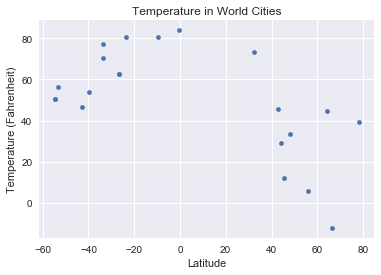

In [60]:
ax_temp = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Temperature (Fahrenheit)",
                marker="o",
                title="Temperature in World Cities",
                grid=True
               );

sea.set()

plt.show

<function matplotlib.pyplot.show>

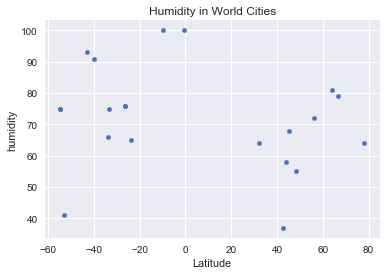

In [61]:
ax_humidity = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="humidity",
                marker="o",
                title="Humidity in World Cities",
                grid=True
               );

sea.set()

plt.show

<function matplotlib.pyplot.show>

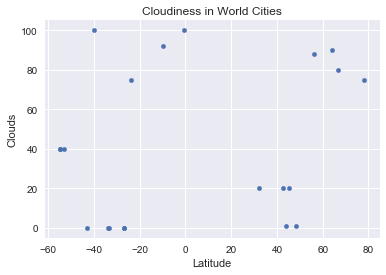

In [62]:
ax_cloudiness = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Clouds",
                marker="o",
                title="Cloudiness in World Cities",
                grid=True
               );

sea.set()

plt.show

<function matplotlib.pyplot.show>

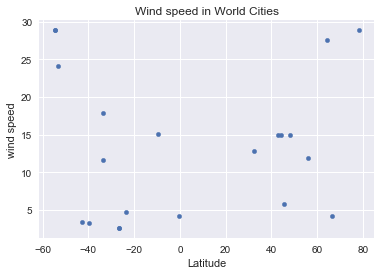

In [59]:
ax_wind_speed = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="wind speed",
                marker="o",
                title="Wind speed in World Cities",
                grid=True
               );
sea.set()

plt.show

In [ ]:
"""
If you plotted with pandas, then save its return value,
call .get_figure(), then .savefig
"""
fig = ax.get_figure()
fig.savefig("TemperatureWorldCities1.png");

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature (Fahrenheit)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities2.png")

# Show plot
plt.show()